
# Linear Interpolation and Numerical Differentiation



## 1. Linear Interpolation

Linear interpolation estimates unknown values between two known data points using the formula:

$$
y = y_0 + \frac{(x - x_0)(y_1 - y_0)}{x_1 - x_0}
$$


### Exercise- 
Find the linear interpolation value at x = 2.5 between the two unkown data points (1, 3) & (4, 12). Print your results.

In [ ]:
# Yor code here to complete the Linear Interpolation Function
x0 = 1; y0 = 3
x1 = 4; y1 = 12
x = 2.5
def y(x):
    return y0 + ( ((x - x0) * (y1 - y0)) / (x1 - x0) )
print(f"Linear interpolation value at x = {x}, y = {y(x)}")

# function needs to be returned, what we've done previously has been assigned variables. 

Linear interpolation value at x = 2.5, y = 7.5



## 2. Numerical Differentiation

Numerical differentiation estimates the derivative of a function using discrete data points.

- Forward Difference:
$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

- Backward Difference:
$$f'(x) \approx \frac{f(x) - f(x-h)}{h}$$

- Central Difference:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$


### Exercise- 
Find the derivative of f = sin (x) at x = pi/4 using foward difference, backward difference, and central difference. You decide the step size.

In [29]:
# Your code here
import math
x = math.pi / 4
h = 0.01
def f(x):
    return math.sin(x)
def dff(x): # foward difference
    return ( f(x + h) - f(x) ) / h
print(f"The foward difference of sin(x) at x = {x} is {dff(x)}")

def dbf(x): # foward difference
    return ( f(x) - f(x - h)) / h
print(f"The backward difference of sin(x) at x = {x} is {dbf(x)}")

def dcf(x): # foward difference
    return ( f(x + h) - f(x - h) ) / (2 * h)
print(f"The central difference of sin(x) at x = {x} is {dcf(x)}")

The foward difference of sin(x) at x = 0.7853981633974483 is 0.7035594916891985
The backward difference of sin(x) at x = 0.7853981633974483 is 0.7106305005757152
The central difference of sin(x) at x = 0.7853981633974483 is 0.7070949961324569



## 3. Numerical Differentiation Using Taylor Series

Implement numerical differentiation formulas for higher-order derivatives using Taylor series expansions. 


### Exercise- 
Usign Taylor series, compute the first to fourth derivatives of the function f(x) = sin(x) and plot them from x= 0 to x= 2(pi). 

First derivative of sin(x) at pi/4 is 0.7071067811865476
Second derivative of sin(x) at pi/4 is -0.7065177219190532
Third derivative of sin(x) at pi/4 is -0.7053407810070909
Fourth derivative of sin(x) at pi/4 is 0.7059291533795252


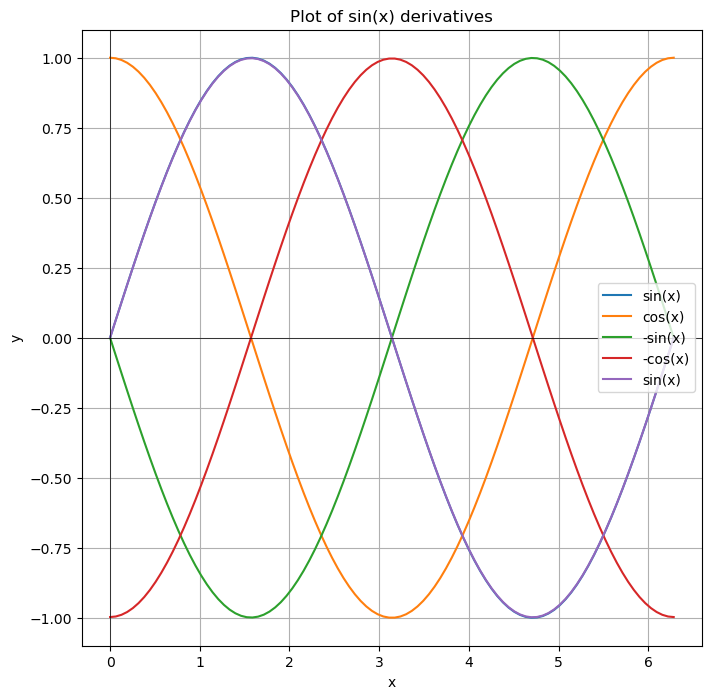

In [11]:
# Your code here
import math
import numpy as np
import matplotlib.pyplot as plt
x = math.pi / 4  
h = .1
def f(x):
    #return math.sin(x) for reasons unknown to me, must use np. instead of math. because something arrays
    return np.sin(x)
def d1f(x):
    #return math.cos(x) same as above
    return np.cos(x)
def d2f(x): # second derivative: central difference
    return ( f(x+h) - 2*f(x) + f(x-h) ) / h**2 
def d3f(x): # third derivative
    return ( f(x+2*h) - 2*f(x+h) + 2*f(x-h) - f(x-2*h) ) / ( 2*(h**3) )
def d4f(x): # fourth derivative
    return ( f(x+2*h)- 4*f(x+h) + 6*f(x) - 4*f(x-h) + f(x-2*h) ) / h**4

print(f"First derivative of sin(x) at pi/4 is {d1f(x)}")
print(f"Second derivative of sin(x) at pi/4 is {d2f(x)}")
print(f"Third derivative of sin(x) at pi/4 is {d3f(x)}")
print(f"Fourth derivative of sin(x) at pi/4 is {d4f(x)}")

x1 = np.linspace(0, 2*math.pi, 100)

plt.figure(figsize=(8, 8))
plt.plot(x1, f(x1), label='sin(x)')
plt.plot(x1, d1f(x1), label='cos(x)')
plt.plot(x1, d2f(x1), label='-sin(x)')
plt.plot(x1, d3f(x1), label='-cos(x)')
plt.plot(x1, d4f(x1), label='sin(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of sin(x) derivatives')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

### Engineering Problem: Beam Deflection Analysis

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$


#### 🎯 Task:
Given deflection data y(x) along a beam, estimate the bending moment M(x) and shear force V(x) using numerical differentiation and plot them. 

Equations:
$$ M(x) = -EI \frac{d^2 y}{dx^2}$$
$$ V(x) = \frac{dM}{dx} $$

#### 📌 Constants:
- L = 10 
- w = 5 
- E = 200e9
- I = 1e-6

Maximum deflection occurs at x = 5.0000
Maximum deflection = 0.0033
Bending moment at max deflection = 62.50
Shear force at max deflection = -0.00


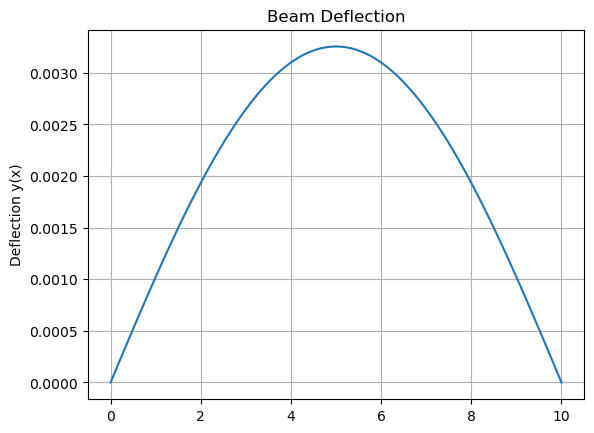

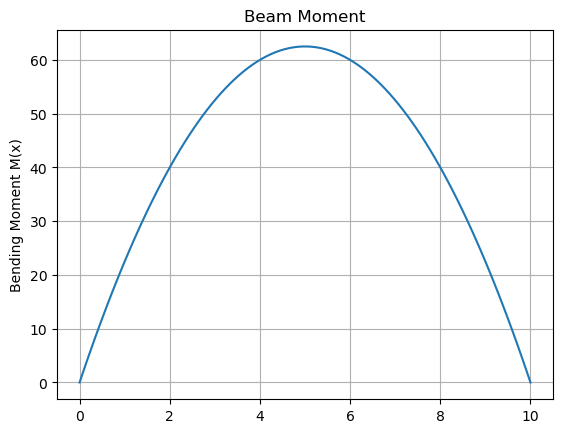

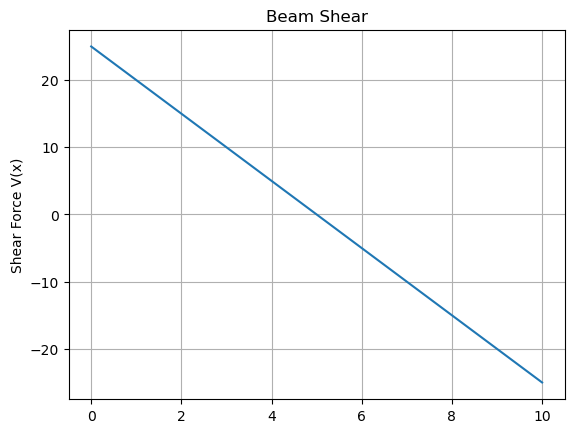

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
w = 5      # kN/m
L = 10     # m
E = 200e9  # Young's modulus in Pa
I = 1e-6   # Moment of inertia in m^4

# Your code here
def y(x): # deflection equation
    return w/(24 * E*I) * x * (L**3 - 2*L*(x**2)+ x**3)

def dy_dx(x): # solving using chain rule (f(x) = y'(x))
    return w/(24 * E*I) * (L**3) - (6 * L * x**2) + (4 * x**3)

def d2y_dx2(x): # df(x) = f'(x)
    return w/(24 * E*I) * (-12*L*x + 12*x**2)

def d3y_dx3(x): # third derivative
    return w/(24 * E*I) * (-12*L + 24*x)

def M(x): # bending moment
    return (-E * I) * d2y_dx2(x)

def V(x): # sheer force
    return (-E * I) * d3y_dx3(x)

def f(x): # maximum deflection, f(x) = dy/dx = 0
    return (L**3) - (6 * L * x**2) + (4 * x**3)

def df(x):
    return 12 * (x**2) - (12 * L * x)

# newton-raphson method for max deflection (finding slope = 0)
max_iteration = 100
tolerance = 0.000001
i = 0
xn = 2
while i <= max_iteration:
    #print("iteration:", i+1)
    xn1 = xn - (f(xn)/df(xn))
    #print(xn1)
    i += 1
    if abs(xn1-xn) <= tolerance:
        break
    else:
        xn = xn1

root_newton = xn; max_deflection_x = root_newton

print(f"Maximum deflection occurs at x = {max_deflection_x:.4f}")
print(f"Maximum deflection = {y(max_deflection_x):.4f}")
print(f"Bending moment at max deflection = {M(max_deflection_x):.2f}")
print(f"Shear force at max deflection = {V(max_deflection_x):.2f}")

x_points = np.linspace(0, L, 100) # range fron 0 to 10
y_deflection = y(x_points)
y_moment = M(x_points)
y_shear = V(x_points)

plt.plot(x_points, y_deflection)
plt.plot(max_deflection_x, y(max_deflection_x))
plt.ylabel('Deflection y(x)')
plt.title('Beam Deflection')
plt.grid()
plt.show()

plt.plot(x_points, y_moment)
plt.ylabel('Bending Moment M(x)')
plt.title('Beam Moment')
plt.grid()
plt.show()

plt.plot(x_points, y_shear)
plt.ylabel('Shear Force V(x)')
plt.title('Beam Shear')
plt.grid()
plt.show()



## 4. Ordinary Differential Equations - Initial Value Problems

This notebook introduces Ordinary Differential Equations (ODEs) with a focus on Initial Value Problems (IVPs). We will explore numerical methods such as Euler's Method and Runge-Kutta Methods with examples and visualizations.



### What is an ODE?

An Ordinary Differential Equation (ODE) is an equation involving a function and its derivatives.

### Initial Value Problem (IVP)
An IVP is an ODE along with a specified value at a starting point:

$$\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$



#### (a) Euler's Method

Algorithm:
1. Choose step size \( h \)
2. Iterate: \( y_{n+1} = y_n + h f(x_n, y_n) \)
3. Repeat for desired number of steps


#### Exercise
Use Euler's Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

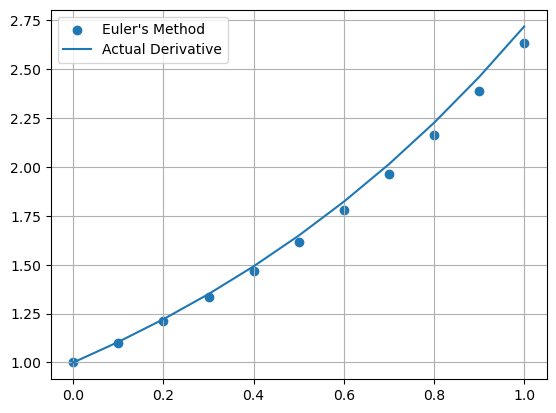

In [38]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return np.exp(x)
x0 = 0
y0 = 1
xs = [x0] # creates a list of x's
ys = [y0]
n = 10 # amount of steps
h = 0.1

for j in range(n):
    y0 += h * f(x0,y0)
    x0 += h
    xs.append(x0)
    ys.append(y0)

plt.scatter(xs, ys, label="Euler's Method")
plt.plot(xs, np.exp(xs), label="Actual Derivative")
plt.legend()
plt.grid()
plt.show()


#### (b) Runge-Kutta Method (RK4)

Algorithm:
1. Compute intermediate slopes:
   - \( k_1 = h f(x_n, y_n) \)
   - \( k_2 = h f(x_n + h/2, y_n + k_1/2) \)
   - \( k_3 = h f(x_n + h/2, y_n + k_2/2) \)
   - \( k_4 = h f(x_n + h, y_n + k_3) \)
2. Update: \( y_{n+1} = y_n + (k_1 + 2k_2 + 2k_3 + k_4)/6 \)


#### Exercise
Use RK4 Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

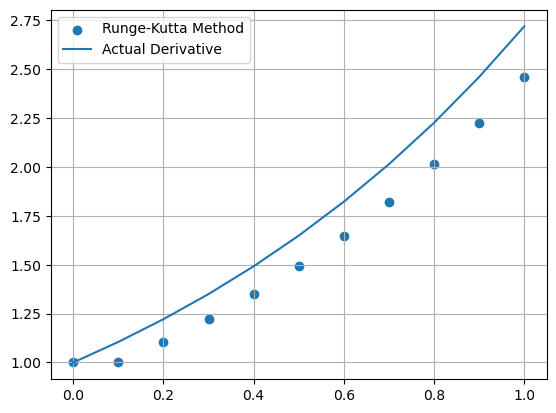

In [54]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return np.exp(x)
x0 = 0
y0 = 1
xs = [x0] # creates a list of x's
ys = [y0]
n = 10 # amount of steps
h = 0.1 # step size

for j in range(0, 10):
    k1 = h * f(x0,y0)
    k2 = h * f(x0 + h/2,y0 + k1/2)
    k3 = h * f(x0 + h/2,y0 + k2/2)
    k4 = h * f(x0 + h, y0 + k3)
    x0 += h
    xs.append(x0)
    ys.append(y0)
    y0 += (k1 + 2*k2 + 2*k3 + k4)/6

plt.scatter(xs, ys, label="Runge-Kutta Method")
plt.plot(xs, np.exp(xs), label="Actual Derivative")
plt.legend()
plt.grid()
plt.show()